### This project implements the KMeans clustering through PCA method algorithm on the wine quality dataset, where the data corresponds to the white_wine at https://archive.ics.uci.edu/dataset/186/wine+quality

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [89]:
df=pd.read_csv('/Users/antoniogondim/Downloads/CSVfiles/winequality-white.csv')
print('Columns:',df.columns)
print('Shape:',df.shape)
df.head()
#let's clean up by removing the ';', so that we won't have any longer a single column

Columns: Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')
Shape: (4898, 1)


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [90]:
df=pd.read_csv('/Users/antoniogondim/Downloads/CSVfiles/winequality-white.csv',sep=';')

In [91]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [92]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [93]:
df.shape

(4898, 12)

In [119]:
df.info() #The K-Means algorithm does not work with categorical data.
putz=df.copy()
putz1=putz.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [95]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


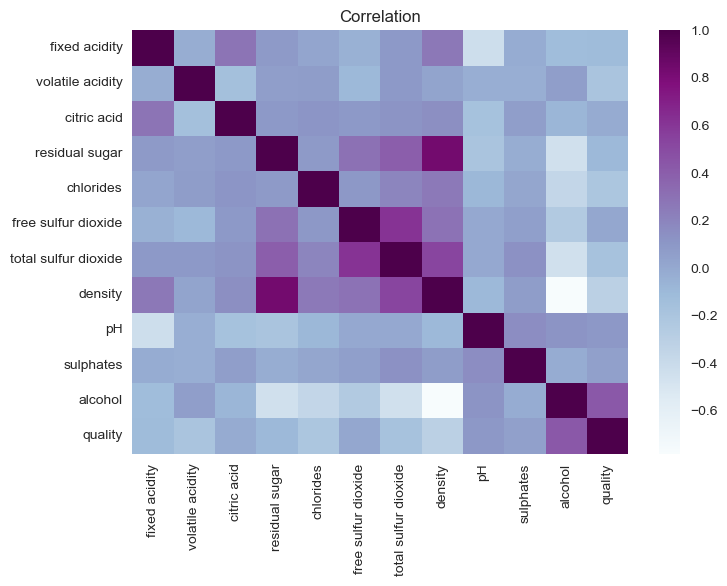

In [97]:
plt.figure()
sns.heatmap(df.corr(),cmap='BuPu')
plt.title('Correlation')
plt.show()

Notice that some pairs of columns are highly correlated, such as density and residual sugar, and levels of alcohol and quality, for instance.

In [98]:
df['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [99]:
X=df.drop('quality',axis=1)

In [100]:
#inertia_ method: Sum of squared distances of samples to their closest cluster center
#init=‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
#n_init: Number of times the k-means algorithm is run with different centroid seeds
v=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k, init='random',n_init='auto',random_state=99)
    kmeans.fit(X)
    v.append(kmeans.inertia_)


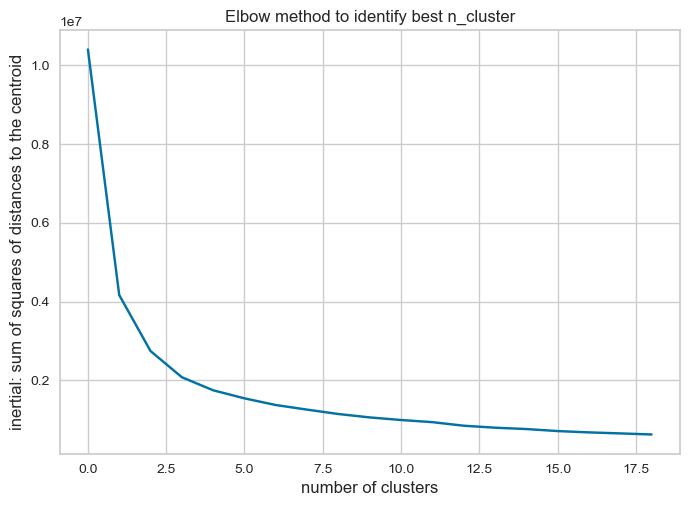

In [101]:
plt.plot(v)
plt.title('Elbow method to identify best n_cluster')
plt.xlabel('number of clusters')
plt.ylabel('inertial: sum of squares of distances to the centroid')
plt.show()

By the elbow method we can see that the best number of clusters should be three.
But, to see that better let's install the yellowbric in order to use the ElbowVisualizer

In [102]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


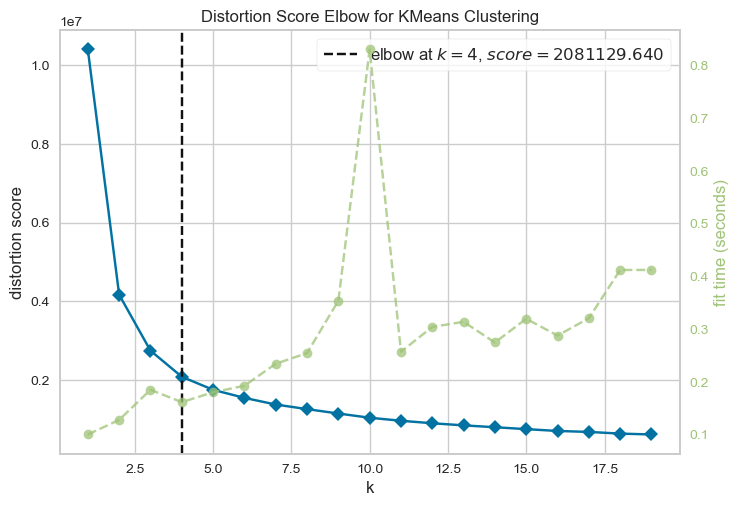

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
#let's supress the warnings
import warnings
warnings.filterwarnings('ignore')
#now the method to find the best  # of clusters through elbow method
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,20))
visualizer.fit(X)
visualizer.show()


Thus by the Elbow Method, the number of clusters occurs k=4 is a good choice.

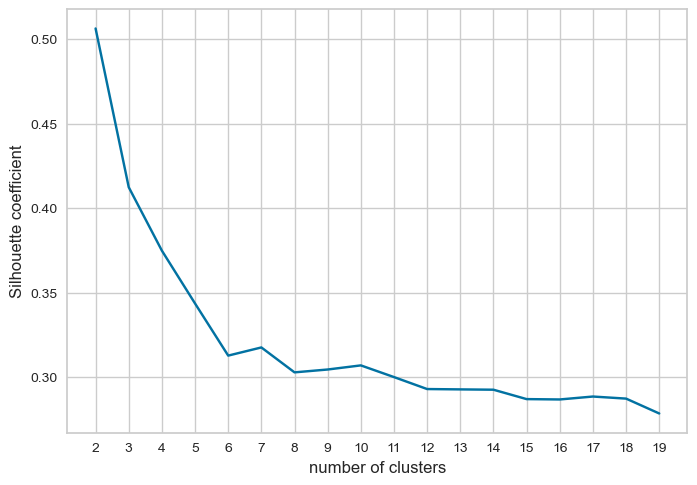

In [104]:
silhouette_avgs = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_avgs.append(score)
plt.plot(range(2,20), silhouette_avgs)
plt.xticks(range(2,20))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [105]:
for i, k in enumerate(silhouette_avgs):
    print(i+2, k)

2 0.5062782327345698
3 0.41235155881494706
4 0.3748083988078105
5 0.3435489874919498
6 0.31271361138095066
7 0.3175441524366166
8 0.30280077276580053
9 0.30448716413891447
10 0.3069256368637744
11 0.30001154710540584
12 0.2929247651784802
13 0.29272396051822275
14 0.2925326398009709
15 0.28697595662452174
16 0.28676392867565875
17 0.28849585475839046
18 0.2872706864542805
19 0.27847452525726957


Now let's use dimensionality reduction, in order to prevent overfitting. Thus, we should firstly standardize the data, i.e, for each column, mean=0

In [106]:
from sklearn.preprocessing import StandardScaler


In [107]:
x=StandardScaler().fit_transform(X)
df3=pd.DataFrame(x)

df3

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while preserving the most important information. When we fit the PCA model to our data using pc.fit_transform(), the resulting transformed data will have the same number of columns as the original data.

PCA works by identifying the directions, called principal components, along which the data varies the most. These principal components are linear combinations of the original features. The first principal component captures the most significant source of variation in the data, the second principal component captures the second most significant source, and so on.


After applying PCA (Principal Component Analysis) for dimensionality reduction on a dataframe, the resulting dataframe will have columns representing the principal components. The number of columns will be equal to the specified number of components in the PCA transformation.

Each principal component column represents a linear combination of the original features in the dataframe. These components are arranged in descending order of their explained variance, meaning the first component captures the most variance in the data, the second component captures the second most variance, and so on.

The names of the columns in the transformed dataframe typically follow a convention such as "PC1", "PC2", "PC3", and so forth, where "PC" stands for Principal Component. These names indicate the order of the components in terms of their explained variance.

The number of principal components is determined by the number of original features in the data. In other words, the maximum number of principal components is equal to the number of columns in the original data. Each principal component is a linear combination of all the original features, and therefore, it requires the same number of dimensions as the original data.

When you apply pc.fit_transform(), it calculates the principal components and projects the original data onto these components, resulting in a new representation of the data with a reduced number of dimensions. However, the number of columns remains the same because each principal component contributes to the transformed representation.

It's important to note that we can choose to keep only a subset of the principal components, effectively reducing the dimensionality of the data. This can be useful when we want to discard less important features or reduce computational complexity. In such cases, we can specify the desired number of components using the n_components parameter in the fit_transform() method, which will result in a transformed data matrix with a reduced number of columns.

Principal Component Analysis (PCA) is often used as a preprocessing step before applying clustering algorithms like K-means. There are a few reasons why PCA is used in combination with K-means:

1)Feature Extraction: PCA can also be seen as a feature extraction technique. It identifies the principal components that capture the most significant sources of variation in the data. These components are linear combinations of the original features and can be considered as new features that represent the data in a more informative way. By using PCA before K-means, you can potentially improve the clustering results by providing more meaningful and representative features.

2)Noise Reduction: PCA can help to remove or reduce the effect of noise in the data. The principal components with low variances capture noise or less significant variations in the data. By discarding these components or keeping only a subset of the most informative components, you can effectively reduce the noise in the data and improve the clustering performance.

3)Speeding up K-means: PCA can speed up the computation of K-means. By reducing the dimensionality of the data, the computational complexity of K-means is reduced as well. With fewer dimensions, the distance calculations and clustering iterations become faster. This can be particularly useful when dealing with large datasets or when you want to perform multiple iterations of K-means with different parameter settings.

Overall, using PCA before fitting the data with K-means can lead to improved clustering results, faster computation, and better interpretability of the results by reducing the dimensionality and extracting more informative features from the data.

In [108]:
from sklearn.decomposition import PCA
df1=df3.copy()

df2=df3.copy()

In [109]:
pca=PCA()
principal_components=pca.fit_transform(df1)
principal_components=pd.DataFrame(principal_components)
principal_components.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

To determine which original data points belong to each label in a scatter plot after applying PCA dimensionality reduction and K-means clustering, you can follow these steps:

Perform PCA and K-means clustering: Apply PCA to reduce the dimensionality of your original data and then perform K-means clustering on the reduced data to assign cluster labels.

Transform the original data: Use the trained PCA model to transform the original data to its lower-dimensional representation. This will map each original data point to the corresponding values in the reduced feature space.

In [110]:
#Now, according to the elbow method and the silhouette_avgs, we'll pick k=4,8
kmeans1 = KMeans(n_clusters=4)
label1 = kmeans1.fit_predict(principal_components)
unique_labels = np.unique(label1)

print('label column',label1)
print('unique labels:',unique_labels)

principal_components=pd.DataFrame(principal_components)
label1=pd.DataFrame(label1)
principal_components['labels']=label1

principal_components

label column [2 3 1 ... 1 3 3]
unique labels: [0 1 2 3]


,0,1,2,3,4,5,6,7,8,9,10,labels
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190,2
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904,3
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295,1
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,2
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337,-0.283772,-0.108921,-0.148646,-0.117824,0.081925,0.023064,3
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347,0.839791,0.033669,-0.157898,-0.474523,0.436497,-0.097257,2
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279,0.133791,-1.616482,-0.278473,-1.239170,0.255397,0.105018,1
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705,0.497135,0.978533,-0.165963,-0.101411,-0.649501,0.018132,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 1 2 3]
the label1 column is:       0
0     2
1     3
2     1
3     2
4     2
...  ..
4893  3
4894  2
4895  1
4896  3
4897  3

[4898 rows x 1 columns]


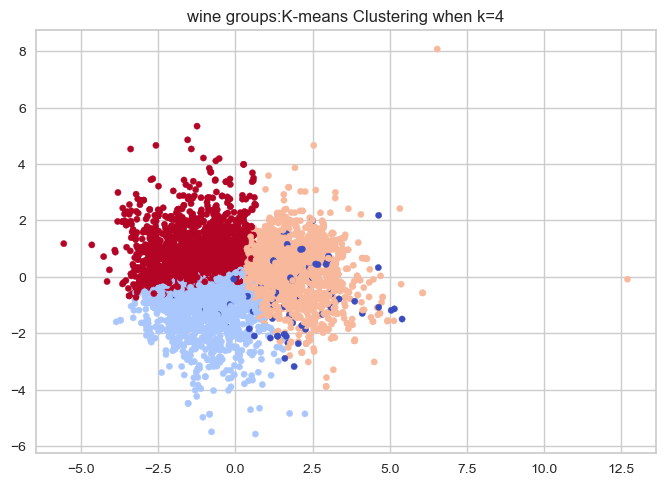

In [112]:
print(unique_labels)
print('the label1 column is:',label1)
plt.scatter(principal_components[0], principal_components[1],c=label1,s=20,cmap='coolwarm')
 

plt.title('wine groups:K-means Clustering when k=4')

plt.show()
#o que falta aqui eh uma legenda para identificar as cores com cada label no plot

In [120]:
putz1['clustering']=label1
putz1
#here we see the cluster of each wine, when k=4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clustering
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


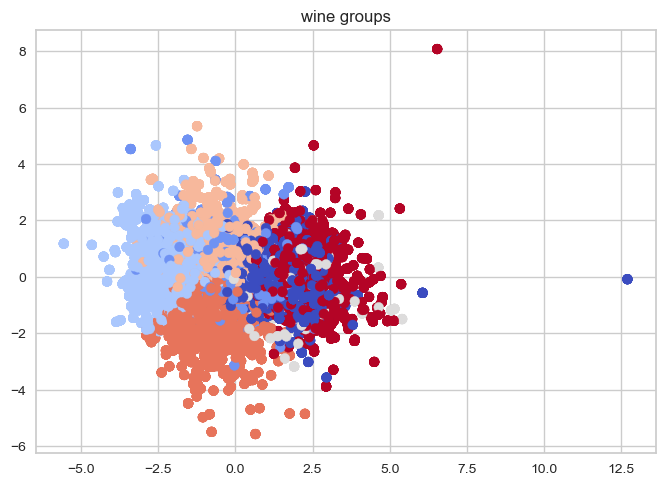

In [113]:
pca=PCA()
principal_components2=pca.fit_transform(df2)
principal_components2=pd.DataFrame(principal_components2)
principal_components2.dtypes


kmeans2 = KMeans(n_clusters=7)
label2 = kmeans2.fit_predict(principal_components2)
unique_labels = np.unique(label2)

principal_components2=pd.DataFrame(principal_components2)
label2=pd.DataFrame(label2)
principal_components2['labels']=label2
principal_components2



for i in unique_labels:
    plt.scatter(principal_components2[0], principal_components2[1], label=i, c=label2,cmap='coolwarm')
    
#plt.legend()
plt.title('wine groups')
plt.show()

#We can see that, eventhough the silhouette coefficients are lesser when k=7, by the elbow method, k=4 is the best

To determine which original data points belong to each label in the scatter plot, it suffices to match its index in the original data with the corresponding index in the new data 'principal_components' dataframe.
In case we wanted to add more data, we'd have to redo the pca transform again, and then kmeans.

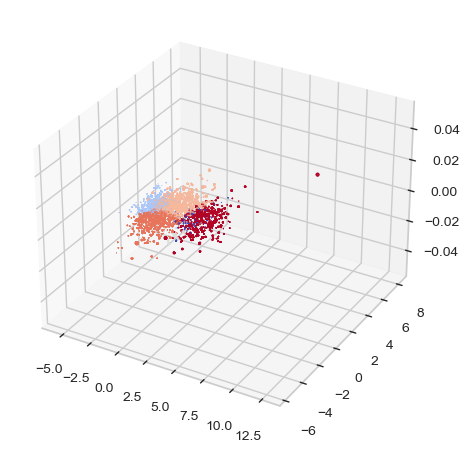

unique labels are: [0 1 2 3 4 5 6] since k=7


In [114]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
data=principal_components2

# Extract x, y, and z coordinates from the data
x = data.iloc[:, 0]
y = data.iloc[:, 1]
z = data.iloc[:, 2]
for i in unique_labels:
    plt.scatter(x,y,z, label=i,c=label2,cmap='coolwarm')
    
# Plot the data points with different colors for each cluster
#ax.scatter(x, y, z, c=label2, cmap='viridis')

# Show the plot
plt.show()
print('unique labels are:',unique_labels,'since k=7')
#AINDA PRECISO CRIAR UMA LEGENDA INDICANDO A Q NOTA CORRESPONDE CADA COR NO PLOT

Now we see that the data is much better splitted, i.e, the clusterings are better defined in dimension 3, when k=7.
Again, the same as above will apply:
To determine which original data points belong to each clustering in the scatter plot, it suffices to match its index in the original data with the corresponding index in the new data 'principal_components' dataframe, and identify its label in the label column.
In case we wanted to add more data, we'd have to redo the pca transform again, and then kmeans.

In [116]:

putz1['clustering']=label2

In [117]:
putz1 
#here we see the cluster for each wine, when k=7

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clustering
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,4
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,5
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,5
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
